     Task:1 :              TITANIC SURVIVAL PREDICTION

PROJECT OBJECTIVE: Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.shape

(418, 12)

In [7]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

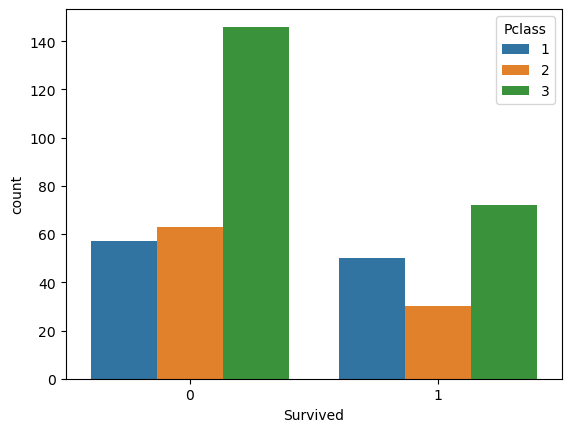

In [8]:
# lets visualize the count of survival wrt Pclass:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [10]:
df['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

<AxesSubplot:xlabel='Sex', ylabel='count'>

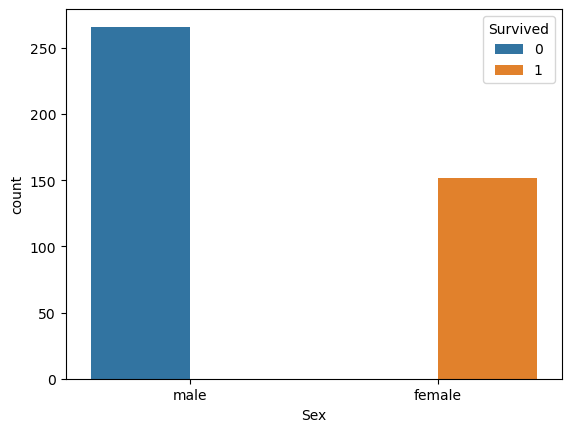

In [12]:
# lets visualize the count of survival wrt Gender:
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [13]:
# look at survival rate by sex:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [15]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
df['Sex'],df['Survived']

(0      1
 1      0
 2      1
 3      1
 4      0
       ..
 413    1
 414    0
 415    1
 416    1
 417    1
 Name: Sex, Length: 418, dtype: int32,
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Survived, Length: 418, dtype: int64)

<AxesSubplot:xlabel='Sex', ylabel='count'>

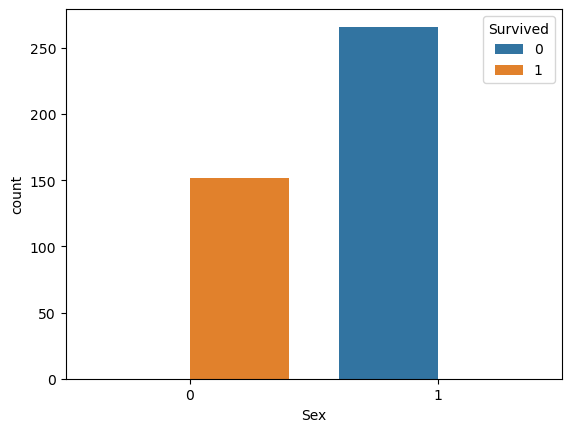

In [19]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [20]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
# after dropping non required column:
df=df.drop(['Age'],axis=1)

In [23]:
df_final=df
df_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",1,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",1,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",1,2,0,A/4 48871,24.1500,NaN,S


MODEL TRANING

In [24]:
X=df[['Pclass','Sex']]
Y=df['Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

MODEL PREDICTION

In [28]:
pred=print(log.predict(X_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [29]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


In [34]:
import warnings
warnings.filterwarnings("ignore")
res=log.predict([[2,0]])
if(res==0):
    print("sorry not survived")
else:
    print("survived")

survived
